In [ ]:
import re


def extract_accuracy_and_error_from_file(file_path):

    with open(file_path, "r") as file:
        text = file.read()

    accuracy_pattern = r"Overall Accuracy:\s*([\d\.]+)"
    error_pattern = r"Mean Standard Error of Accuracy across questions:\s*([\d\.]+)"

    accuracy_matches = re.findall(accuracy_pattern, text)
    error_matches = re.findall(error_pattern, text)

    accuracies = [float(match) for match in accuracy_matches]
    errors = [float(match) for match in error_matches]

    return accuracies, errors

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_name = "run_bench_sglang_log.txt"
acc, std_err = extract_accuracy_and_error_from_file(file_name)
print(len(acc))
print(f"collected accuracy: {acc}")
print(f"collected std_err: {std_err}")

30
collected accuracy: [0.28541666666666665, 0.2942708333333333, 0.28958333333333336, 0.3020833333333333, 0.28958333333333336, 0.296875, 0.28072916666666664, 0.29322916666666665, 0.3020833333333333, 0.29375, 0.29010416666666666, 0.2984375, 0.30364583333333334, 0.284375, 0.30572916666666666, 0.2869791666666667, 0.290625, 0.28229166666666666, 0.29322916666666665, 0.3026041666666667, 0.30364583333333334, 0.2953125, 0.27708333333333335, 0.28125, 0.28072916666666664, 0.2875, 0.290625, 0.30052083333333335, 0.2786458333333333, 0.2942708333333333]
collected std_err: [0.035201632606296725, 0.03134322012470038, 0.032452587524063874, 0.03452709098297168, 0.03398239926337754, 0.03546449781106429, 0.03508280656342587, 0.033619323041767, 0.03328460190839696, 0.03571898947311389, 0.0351973036418381, 0.03420061389719205, 0.0331551124068319, 0.03276353645113385, 0.03367541292201664, 0.03470922972792655, 0.03276485266320404, 0.03437031472114375, 0.03424505125408969, 0.034262246348800866, 0.0350781886944

In [ ]:
def calculate_statistics(data, data_type="Accuracy"):
    """calculate mean, median, standard deviation, and standard error"""
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    std_err = std_dev / np.sqrt(len(data))
    print(f"\n{data_type} Statistics:")
    print(f"Mean: {mean:.4f}")
    print(f"Median: {median:.4f}")
    print(f"Standard Deviation: {std_dev:.4f}")
    print(f"Standard Error(SE): {std_err:.4f}")
    return mean, std_err


acc_mean, acc_std_err = calculate_statistics(acc)
err_mean, err_std_err = calculate_statistics(std_err, data_type="Error")


Accuracy Statistics:
Mean: 0.2918
Median: 0.2919
Standard Deviation: 0.0081
Standard Error(SE): 0.0015

Error Statistics:
Mean: 0.0341
Median: 0.0343
Standard Deviation: 0.0010
Standard Error(SE): 0.0002



Standard Error Statistics:
Mean: 0.0341
Median: 0.0343
Standard Deviation: 0.0010
Standard Error(SE): 0.0002


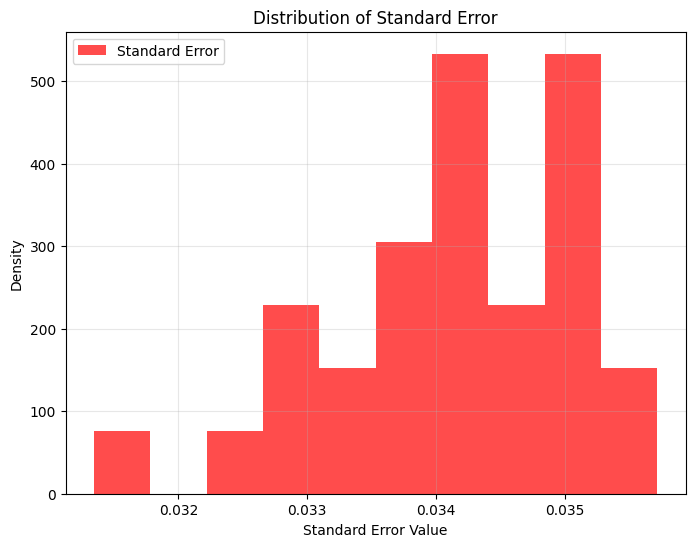

In [ ]:
def plot_std_error_histogram(errors):
    """histogram of errors"""
    plt.figure(figsize=(8, 6))
    # histogram
    n, bins, patches = plt.hist(
        errors, bins=10, alpha=0.7, color="red", label="Standard Error", density=True
    )

    mean_err, _ = calculate_statistics(errors, "Standard Error")

    plt.xlabel("Standard Error Value")
    plt.ylabel("Density")
    plt.title("Distribution of Standard Error")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


plot_std_error_histogram(std_err)


Accuracy Statistics:
Mean: 0.2918
Median: 0.2919
Standard Deviation: 0.0081
Standard Error(SE): 0.0015
The INTERVAL Mean ± 1.96*SE: 0.2577 - 0.3259
accuracy:[0.28541666666666665, 0.2942708333333333, 0.28958333333333336, 0.3020833333333333, 0.28958333333333336, 0.296875, 0.28072916666666664, 0.29322916666666665, 0.3020833333333333, 0.29375, 0.29010416666666666, 0.2984375, 0.30364583333333334, 0.284375, 0.30572916666666666, 0.2869791666666667, 0.290625, 0.28229166666666666, 0.29322916666666665, 0.3026041666666667, 0.30364583333333334, 0.2953125, 0.27708333333333335, 0.28125, 0.28072916666666664, 0.2875, 0.290625, 0.30052083333333335, 0.2786458333333333, 0.2942708333333333]
Proportion of accuracies within ±1 Standard Error of mean: 1.0000 (100.0%)


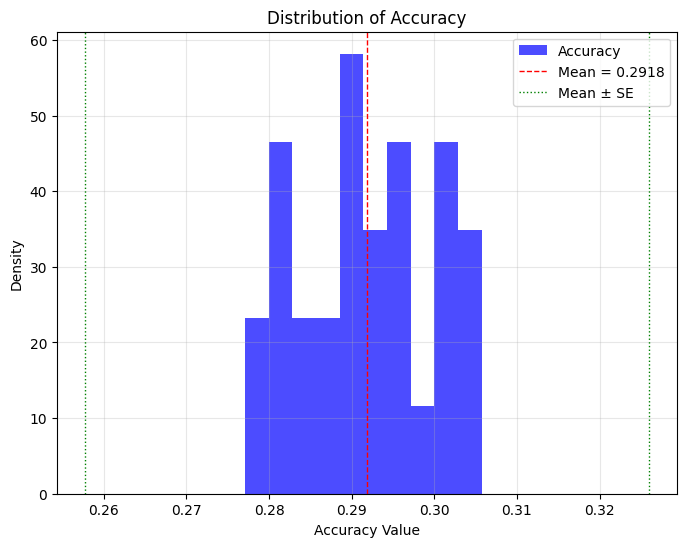

<Figure size 640x480 with 0 Axes>

In [ ]:
from typing import Optional


def plot_accuracy_histogram(accuracies, mean_of_stderr: Optional[float] = None):
    plt.figure(figsize=(8, 6))
    # histogram
    n, bins, patches = plt.hist(
        accuracies, bins=10, alpha=0.7, color="blue", label="Accuracy", density=True
    )
    # statistics
    mean_acc, std_err_acc = calculate_statistics(accuracies, "Accuracy")

    # mean line
    plt.axvline(
        mean_acc,
        color="red",
        linestyle="dashed",
        linewidth=1,
        label=f"Mean = {mean_acc:.4f}",
    )
    # ±1.96*SE lines
    sigma = 0
    if mean_of_stderr is None:
        # use calculated standard error of collected acc
        sigma = std_err_acc
    else:
        # direct use mean of collected standard errors
        sigma = mean_of_stderr

    coefficient = 1
    plt.axvline(
        mean_acc + coefficient * sigma,
        color="green",
        linestyle="dotted",
        linewidth=1,
        label=f"Mean ± SE",
    )
    plt.axvline(
        mean_acc - coefficient * sigma, color="green", linestyle="dotted", linewidth=1
    )
    # print the interval
    print(
        f"The INTERVAL Mean ± 1.96*SE: {mean_acc - coefficient*sigma:.4f} - {mean_acc + coefficient*sigma:.4f}"
    )
    print(f"accuracy:{accuracies}")
    # calculate the proportion of accuracies within ±1.96*SE
    within_se = np.sum(
        (accuracies >= mean_acc - coefficient * sigma)
        & (accuracies <= mean_acc + coefficient * sigma)
    ) / len(accuracies)
    print(
        f"Proportion of accuracies within ±1 Standard Error of mean: {within_se:.4f} ({within_se*100:.1f}%)"
    )

    plt.xlabel("Accuracy Value")
    plt.ylabel("Density")
    plt.title("Distribution of Accuracy")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    plt.savefig("accuracy_histogram.png")


# USE CALCULATED std_err
# plot_accuracy_histogram(acc)
# USE MEAN OF COLLECTED std_err
plot_accuracy_histogram(acc, err_mean)

[0.08907259725345175, 0.06261387718126833, 0.048692921899145786, 0.035591371241030414, 0.024175741271730767, 0.01774859670564716]


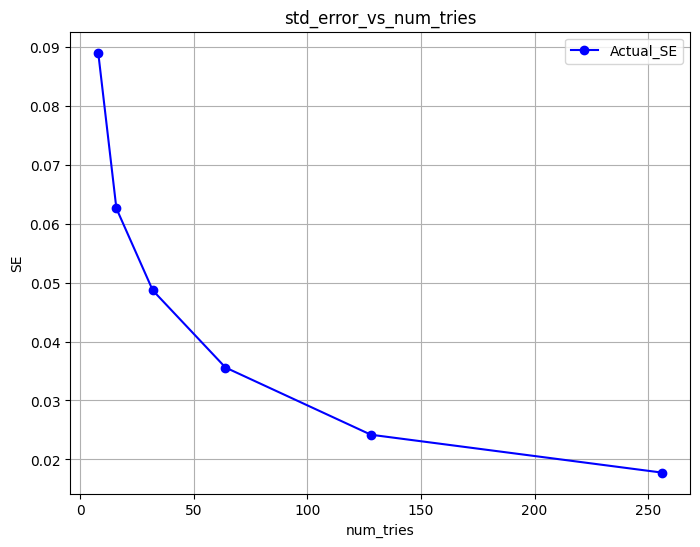

In [ ]:
# num tries with collected std_err
def plot_num_tries_with_acc():
    num_tries = [8, 16, 32, 64, 128, 256]
    acc, SE = extract_accuracy_and_error_from_file(
        "run_bench_sglang_log_multi_tries.txt"
    )
    print(SE)
    sigma = 1.0
    theoretical_se = sigma / np.sqrt(num_tries)

    # ploting
    plt.figure(figsize=(8, 6))
    plt.plot(num_tries, SE, "o-", label="Actual_SE", color="blue")
    # plt.plot(num_tries, theoretical_se, 's--', label='Theoretical:(1/√n)', color='red')
    plt.xlabel("num_tries")
    plt.ylabel("SE")
    plt.title("std_error_vs_num_tries")
    # plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


# exclude red line&one plot with red/one plot without
plot_num_tries_with_acc()